In [1]:
import pandas_datareader as pdr
import pandas as pd

In [2]:
key = "ec9f337c06668b4bd2e04bbaf560780edb4d2904"

In [3]:
df = pdr.get_data_tiingo('AMZN', api_key=key)

In [4]:
df.to_csv('AMZN.csv')

In [5]:
# pandas
df = pd.read_csv('AMZN.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AMZN,2016-11-22 00:00:00+00:00,785.33,792.40,781.00,788.17,5311320,785.33,792.40,781.00,788.17,5311320,0.0,1.0
1,AMZN,2016-11-23 00:00:00+00:00,780.12,781.75,773.12,781.73,3540263,780.12,781.75,773.12,781.73,3540263,0.0,1.0
2,AMZN,2016-11-25 00:00:00+00:00,780.37,786.75,777.90,786.50,1837068,780.37,786.75,777.90,786.50,1837068,0.0,1.0
3,AMZN,2016-11-28 00:00:00+00:00,766.77,777.00,764.24,776.99,4438828,766.77,777.00,764.24,776.99,4438828,0.0,1.0
4,AMZN,2016-11-29 00:00:00+00:00,762.52,769.89,761.32,768.00,3272344,762.52,769.89,761.32,768.00,3272344,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AMZN,2021-11-15 00:00:00+00:00,3545.68,3593.880,3525.8100,3537.00,2929719,3545.68,3593.880,3525.8100,3537.00,2929719,0.0,1.0
1254,AMZN,2021-11-16 00:00:00+00:00,3540.70,3576.500,3525.1466,3539.00,2217071,3540.70,3576.500,3525.1466,3539.00,2217071,0.0,1.0
1255,AMZN,2021-11-17 00:00:00+00:00,3549.00,3587.245,3545.3500,3564.72,2560270,3549.00,3587.245,3545.3500,3564.72,2560270,0.0,1.0
1256,AMZN,2021-11-18 00:00:00+00:00,3696.06,3704.200,3561.0000,3566.35,5703538,3696.06,3704.200,3561.0000,3566.35,5703538,0.0,1.0
1257,AMZN,2021-11-19 00:00:00+00:00,3676.57,3762.145,3675.7200,3712.69,4946203,3676.57,3762.145,3675.7200,3712.69,4946203,0.0,1.0


In [8]:
df1 = df.reset_index()['close']

In [9]:
df1

0        785.33
1        780.12
2        780.37
3        766.77
4        762.52
         ...   
1253    3545.68
1254    3540.70
1255    3549.00
1256    3696.06
1257    3676.57
Name: close, Length: 1258, dtype: float64

In [10]:
df1.shape

(1258,)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

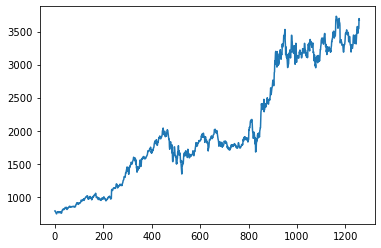

In [12]:
plt.plot(df1)

In [13]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.01504144]
 [0.01329959]
 [0.01338317]
 ...
 [0.93901514]
 [0.98818149]
 [0.98166542]]


In [15]:
#splitting dataset into train and test split

training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1), :1]

In [16]:
training_size, test_size

(817, 441)

In [17]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range( len(dataset) - time_step - 1 ):
		a = dataset[i : (i + time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train)

[[0.01504144 0.01329959 0.01338317 ... 0.04825363 0.0540442  0.05464265]
 [0.01329959 0.01338317 0.0088363  ... 0.0540442  0.05464265 0.05311143]
 [0.01338317 0.0088363  0.00741541 ... 0.05464265 0.05311143 0.05406761]
 ...
 [0.34368637 0.33416135 0.32935037 ... 0.47124608 0.46623115 0.47318518]
 [0.33416135 0.32935037 0.33284744 ... 0.46623115 0.47318518 0.47804966]
 [0.32935037 0.33284744 0.33276052 ... 0.47318518 0.47804966 0.47232596]]


In [20]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape( X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape( X_test.shape[0], X_test.shape[1] , 1)

In [23]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model = Sequential()
model.add(LSTM( 50, return_sequences = True,input_shape = (100,1) ))
model.add(LSTM( 50, return_sequences = True ))
model.add(LSTM( 50 ))
model.add(Dense( 1 ))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 242ms/step - loss: 0.0181 - val_loss: 0.1075
Epoch 2/100
12/12 [==============================] - 2s 144ms/step - loss: 0.0036 - val_loss: 0.0153
Epoch 3/100
12/12 [==============================] - 2s 138ms/step - loss: 0.0016 - val_loss: 0.0129
Epoch 4/100
12/12 [==============================] - 2s 149ms/step - loss: 9.3855e-04 - val_loss: 0.0100
Epoch 5/100
12/12 [==============================] - 2s 155ms/step - loss: 7.5708e-04 - val_loss: 0.0058
Epoch 6/100
12/12 [==============================] - 2s 178ms/step - loss: 8.1268e-04 - val_loss: 0.0034
Epoch 7/100
12/12 [==============================] - 2s 152ms/step - loss: 6.9535e-04 - val_loss: 0.0033
Epoch 8/100
12/12 [==============================] - 2s 128ms/step - loss: 6.6261e-04 - val_loss: 0.0028
Epoch 9/100
12/12 [==============================] - 1s 124ms/step - loss: 6.3809e-04 - val_loss: 0.0038
Epoch 10/100
12/12 [==============================] - 1s 125ms/step

12/12 [==============================] - 2s 131ms/step - loss: 3.0162e-04 - val_loss: 0.0117
Epoch 79/100
12/12 [==============================] - 2s 130ms/step - loss: 2.8454e-04 - val_loss: 0.0089
Epoch 80/100
12/12 [==============================] - 2s 132ms/step - loss: 2.5627e-04 - val_loss: 0.0043
Epoch 81/100
12/12 [==============================] - 2s 134ms/step - loss: 2.5032e-04 - val_loss: 0.0096
Epoch 82/100
12/12 [==============================] - 2s 133ms/step - loss: 2.6968e-04 - val_loss: 0.0050
Epoch 83/100
12/12 [==============================] - 2s 132ms/step - loss: 2.3485e-04 - val_loss: 0.0068
Epoch 84/100
12/12 [==============================] - 2s 131ms/step - loss: 2.3578e-04 - val_loss: 0.0017
Epoch 85/100
12/12 [==============================] - 2s 131ms/step - loss: 2.4573e-04 - val_loss: 0.0053
Epoch 86/100
12/12 [==============================] - 2s 131ms/step - loss: 2.3321e-04 - val_loss: 0.0032
Epoch 87/100
12/12 [==============================] - 2s 15

In [27]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [28]:
# Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

1595.787429164462

In [31]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest, test_predict))

3253.1130171758036

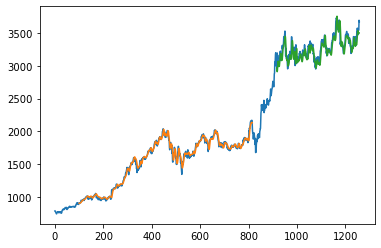

In [32]:
import numpy as np
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

441

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.9002229971214315,
 0.9263039648018936,
 0.9813879314091611,
 0.9883553377219523,
 1.0,
 0.995964654789089,
 0.9957005352599573,
 0.9819295436081403,
 0.9833738428054175,
 0.9664969392224187,
 0.9472496464475924,
 0.939212388877559,
 0.9471025418997217,
 0.9511178273995593,
 0.9687804029995957,
 0.9750022567174956,
 0.9894385621199104,
 0.9648888190513762,
 0.9662027301266771,
 0.9560391431828743,
 0.864991457906368,
 0.8662919958409532,
 0.8779132551227486,
 0.8740617905966761,
 0.881172958172159,
 0.8707920576917292,
 0.8697656691418121,
 0.8626812478477601,
 0.853129482091693,
 0.85693748391044,
 0.8537513331349651,
 0.8554296622947641,
 0.8363629069195975,
 0.8227423631008302,
 0.8182389579648754,
 0.822317765883112,
 0.8443567017823053,
 0.8576997529312254,
 0.8554931847131628,
 0.8611165903840432,
 0.872360058440625,
 0.8964116520175056,
 0.9128673016679649,
 0.9156121387998275,
 0.9103030019357621,
 0.9152945267078338,
 0.9257389496066626,
 0.931158414881631,
 0.91733727395213

In [37]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.95937586]
101
1 day input [0.92630396 0.98138793 0.98835534 1.         0.99596465 0.99570054
 0.98192954 0.98337384 0.96649694 0.94724965 0.93921239 0.94710254
 0.95111783 0.9687804  0.97500226 0.98943856 0.96488882 0.96620273
 0.95603914 0.86499146 0.866292   0.87791326 0.87406179 0.88117296
 0.87079206 0.86976567 0.86268125 0.85312948 0.85693748 0.85375133
 0.85542966 0.83636291 0.82274236 0.81823896 0.82231777 0.8443567
 0.85769975 0.85549318 0.86111659 0.87236006 0.89641165 0.9128673
 0.91561214 0.910303   0.91529453 0.92573895 0.93115841 0.91733727
 0.912319   0.90831375 0.90591661 0.91453894 0.91870133 0.9101024
 0.87439946 0.87035409 0.88253033 0.89454944 0.89773225 0.89113929
 0.86110322 0.85614178 0.85076578 0.85017067 0.81891764 0.82935538
 0.84306619 0.85657975 0.85196268 0.83781389 0.83815825 0.85051169
 0.85572053 0.89221583 0.9048267  0.90396079 0.89423517 0.90090503
 0.86765271 0.86257761 0.8811997  0.88668938 0.90476986 0.87998275
 0.86182202 0.86003002 0.88385093 0.

9 day output [[0.9478434]]
10 day input [0.94724965 0.93921239 0.94710254 0.95111783 0.9687804  0.97500226
 0.98943856 0.96488882 0.96620273 0.95603914 0.86499146 0.866292
 0.87791326 0.87406179 0.88117296 0.87079206 0.86976567 0.86268125
 0.85312948 0.85693748 0.85375133 0.85542966 0.83636291 0.82274236
 0.81823896 0.82231777 0.8443567  0.85769975 0.85549318 0.86111659
 0.87236006 0.89641165 0.9128673  0.91561214 0.910303   0.91529453
 0.92573895 0.93115841 0.91733727 0.912319   0.90831375 0.90591661
 0.91453894 0.91870133 0.9101024  0.87439946 0.87035409 0.88253033
 0.89454944 0.89773225 0.89113929 0.86110322 0.85614178 0.85076578
 0.85017067 0.81891764 0.82935538 0.84306619 0.85657975 0.85196268
 0.83781389 0.83815825 0.85051169 0.85572053 0.89221583 0.9048267
 0.90396079 0.89423517 0.90090503 0.86765271 0.86257761 0.8811997
 0.88668938 0.90476986 0.87998275 0.86182202 0.86003002 0.88385093
 0.91494348 0.92898194 0.91894874 0.9481189  0.91663184 0.913439
 0.9310414  0.93790516 0.936

19 day output [[0.94873846]]
20 day input [0.86499146 0.866292   0.87791326 0.87406179 0.88117296 0.87079206
 0.86976567 0.86268125 0.85312948 0.85693748 0.85375133 0.85542966
 0.83636291 0.82274236 0.81823896 0.82231777 0.8443567  0.85769975
 0.85549318 0.86111659 0.87236006 0.89641165 0.9128673  0.91561214
 0.910303   0.91529453 0.92573895 0.93115841 0.91733727 0.912319
 0.90831375 0.90591661 0.91453894 0.91870133 0.9101024  0.87439946
 0.87035409 0.88253033 0.89454944 0.89773225 0.89113929 0.86110322
 0.85614178 0.85076578 0.85017067 0.81891764 0.82935538 0.84306619
 0.85657975 0.85196268 0.83781389 0.83815825 0.85051169 0.85572053
 0.89221583 0.9048267  0.90396079 0.89423517 0.90090503 0.86765271
 0.86257761 0.8811997  0.88668938 0.90476986 0.87998275 0.86182202
 0.86003002 0.88385093 0.91494348 0.92898194 0.91894874 0.9481189
 0.91663184 0.913439   0.9310414  0.93790516 0.93624021 0.93901514
 0.98818149 0.98166542 0.95937586 0.96928298 0.97150922 0.96960205
 0.96597898 0.96185333 

28 day output [[0.94413006]]
29 day input [0.85693748 0.85375133 0.85542966 0.83636291 0.82274236 0.81823896
 0.82231777 0.8443567  0.85769975 0.85549318 0.86111659 0.87236006
 0.89641165 0.9128673  0.91561214 0.910303   0.91529453 0.92573895
 0.93115841 0.91733727 0.912319   0.90831375 0.90591661 0.91453894
 0.91870133 0.9101024  0.87439946 0.87035409 0.88253033 0.89454944
 0.89773225 0.89113929 0.86110322 0.85614178 0.85076578 0.85017067
 0.81891764 0.82935538 0.84306619 0.85657975 0.85196268 0.83781389
 0.83815825 0.85051169 0.85572053 0.89221583 0.9048267  0.90396079
 0.89423517 0.90090503 0.86765271 0.86257761 0.8811997  0.88668938
 0.90476986 0.87998275 0.86182202 0.86003002 0.88385093 0.91494348
 0.92898194 0.91894874 0.9481189  0.91663184 0.913439   0.9310414
 0.93790516 0.93624021 0.93901514 0.98818149 0.98166542 0.95937586
 0.96928298 0.97150922 0.96960205 0.96597898 0.96185333 0.95775884
 0.95395333 0.95060521 0.94784337 0.94575524 0.94437236 0.94367248
 0.94358212 0.9439913

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
import matplotlib.pyplot as plt

In [40]:
len(df1)

1258

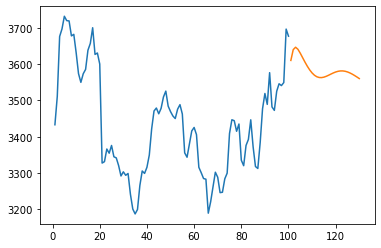

In [41]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

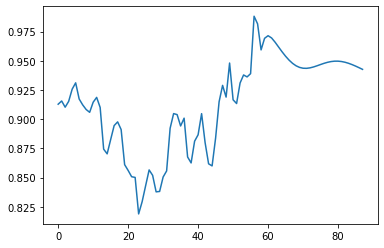

In [42]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [43]:
df3=scaler.inverse_transform(df3).tolist()

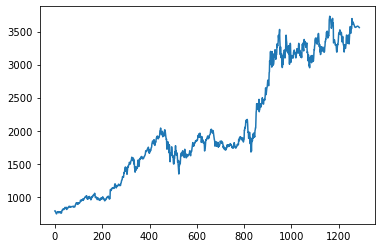

In [44]:
plt.plot(df3)